In [2]:
from typing import List, Dict, Tuple

import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__WORKING_BRANCH_PATH = (
    "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch"
)

hatch = {
    'Vector': '',
    'Skiplist': '\\\\\\\\\\\\',
    'Hashskiplist': '//',
    'Hashlinklist': '----'
}

linestyle = {
    'Vector': '-',
    'Skiplist': '-',
    'Hashskiplist': '-.',
    'Hashlinklist': '..'
}

alpha = {
    'Vector': 1,
    'Skiplist': 0.6,
    'Hashskiplist': 1,
    'Hashlinklist': 0.8
}

color = {
    # 'Vector': 'darkslateblue',
    # 'Skiplist': 'olive',
    # 'Hashskiplist': 'darkred',
    # 'Hashlinklist': 'steelblue'
    # 'Vector': 'black',
    # 'Skiplist': 'black',
    # 'Hashskiplist': 'black',
    # 'Hashlinklist': 'black'
}

edgecolor = {
    'Vector': 'black',
    'Skiplist': 'black',
    'Hashskiplist': 'black',
    'Hashlinklist': 'black'
}

label = {
    'Vector': 'vector',
    'Skiplist': 'skiplist',
    'Hashskiplist': 'hash skiplist',
    'Hashlinklist': 'hash linklist'
}

plt.rcParams["font.family"] = "serif"

alphabets = "abcdefghijklmnopqrstuvwxyz"


In [3]:
def get_properties(key: str) -> Dict[str, str]:
    if key.capitalize() in label:
        return {
            # "label": label.get(key.capitalize()),
            "color": color.get(key.capitalize()) or "None",
            "edgecolor": edgecolor.get(key.capitalize()) or "None",
            # "linestyle": linestyle.get(key.capitalize()),
            "hatch": hatch.get(key.capitalize()),
            "alpha": alpha.get(key.capitalize()),
        }
    else:
        raise ValueError(f"Unknown key: {key}")

In [4]:
def get_times(log_file, key="InsertTime: "):

    result_list = list()

    for line in open(log_file, 'r').readlines():
        if line.startswith(key):
            result_list.append(int(line.split(' ')[1]))

    return result_list

In [5]:
import io

l = 6
bck = 100000
srange = 0.0001
lrange = 0.8

vec_log_file = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-PQ-0-64/I 140000 U 0 S 0 Y 0 Q 200 m vector E 64 B 64 P 4096 T 4/workload.log"
skip_log_file = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-PQ-0-64/I 140000 U 0 S 0 Y 0 Q 200 m skiplist E 64 B 64 P 4096 T 4/workload.log"
hash_skip_list_file_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-PQ-0-64/I 140000 U 0 S 0 Y 0 Q 200 m hashskiplist E 64 B 64 P 4096 T 4 l 6 bucket_count 100000/workload.log"
hash_link_list_file_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-PQ-0-64/I 140000 U 0 S 0 Y 0 Q 200 m hashlinklist E 64 B 64 P 4096 T 4 l 6 bucket_count 100000/workload.log"

vec_list_write = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-IN-0-64/I 1000000 U 0 S 0 Y 0 Q 0 m vector E 64 B 64 P 4096 T 4/workload.log"
skip_list_write = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-IN-0-64/I 1000000 U 0 S 0 Y 0 Q 0 m skiplist E 64 B 64 P 4096 T 4/workload.log"
hash_link_list_write_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-IN-0-64/I 1000000 U 0 S 0 Y 0 Q 0 m hashlinklist E 64 B 64 P 4096 T 4 l {l} bucket_count {bck}/workload.log"
hash_skip_list_write_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-IN-0-64/I 1000000 U 0 S 0 Y 0 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l {l} bucket_count {bck}/workload.log"

vec_range_log_file = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{srange}-64/I 140000 U 0 S 200 Y {srange} Q 0 m vector E 64 B 64 P 4096 T 4/workload.log"
skip_range_log_file = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{srange}-64/I 140000 U 0 S 200 Y {srange} Q 0 m skiplist E 64 B 64 P 4096 T 4/workload.log"
hash_skip_list_range_log_file_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{srange}-64/I 140000 U 0 S 200 Y {srange} Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l {l} bucket_count {bck}/workload.log"
hash_link_list_range_log_file_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{srange}-64/I 140000 U 0 S 200 Y {srange} Q 0 m hashlinklist E 64 B 64 P 4096 T 4 l {l} bucket_count {bck}/workload.log"

vec_lrange_log_file = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{lrange}-64/I 140000 U 0 S 200 Y {lrange} Q 0 m vector E 64 B 64 P 4096 T 4/workload.log"
skip_lrange_log_file = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{lrange}-64/I 140000 U 0 S 200 Y {lrange} Q 0 m skiplist E 64 B 64 P 4096 T 4/workload.log"
hash_skip_list_lrange_log_file_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{lrange}-64/I 140000 U 0 S 200 Y {lrange} Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l {l} bucket_count {bck}/workload.log"
hash_link_list_lrange_log_file_6_100000 = f"/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-{lrange}-64/I 140000 U 0 S 200 Y {lrange} Q 0 m hashlinklist E 64 B 64 P 4096 T 4 l {l} bucket_count {bck}/workload.log"


vec_insert_time = get_times(vec_list_write, key="InsertTime: ")
skip_insert_time = get_times(skip_list_write, key="InsertTime: ")
hash_skip_insert_time = get_times(hash_skip_list_write_6_100000, key="InsertTime: ")
hash_link_insert_time = get_times(hash_link_list_write_6_100000, key="InsertTime: ")

vec_pq_time = get_times(vec_log_file, key="PointQueryTime: ")
skip_pq_time = get_times(skip_log_file, key="PointQueryTime: ")
hash_skip_pq_time = get_times(hash_skip_list_file_6_100000, key="PointQueryTime: ")
hash_link_pq_time = get_times(hash_link_list_file_6_100000, key="PointQueryTime: ")

vec_range_time = get_times(vec_range_log_file, key="RangeQueryTime: ")
skip_range_time = get_times(skip_range_log_file, key="RangeQueryTime: ")
hash_skip_range_time = get_times(hash_skip_list_range_log_file_6_100000, key="RangeQueryTime: ")
hash_link_range_time = get_times(hash_link_list_range_log_file_6_100000, key="RangeQueryTime: ")

vec_lrange_time = get_times(vec_lrange_log_file, key="RangeQueryTime: ")
skip_lrange_time = get_times(skip_lrange_log_file, key="RangeQueryTime: ")
hash_skip_lrange_time = get_times(hash_skip_list_lrange_log_file_6_100000, key="RangeQueryTime: ")
hash_link_lrange_time = get_times(hash_link_list_lrange_log_file_6_100000, key="RangeQueryTime: ")



In [13]:
avg_time_insert = {
    'Vector': sum(vec_insert_time)/len(vec_insert_time),
    'Skip': sum(skip_insert_time)/len(skip_insert_time),
    'HashSkipList': sum(hash_skip_insert_time)/len(hash_skip_insert_time),
    'HashLinkList': sum(hash_link_insert_time)/len(hash_link_insert_time)
}

In [14]:
avg_time_pq = {
    'Vector': sum(vec_pq_time)/len(vec_pq_time),
    'Skip': sum(skip_pq_time)/len(skip_pq_time),
    'HashSkipList': sum(hash_skip_pq_time)/len(hash_skip_pq_time),
    'HashLinkList': sum(hash_link_pq_time)/len(hash_link_pq_time)
}

In [15]:
avg_time_range = {
    'Vector': sum(vec_range_time)/len(vec_range_time),
    'Skip': sum(skip_range_time)/len(skip_range_time),
    'HashSkipList': sum(hash_skip_range_time)/len(hash_skip_range_time),
    'HashLinkList': sum(hash_link_range_time)/len(hash_link_range_time)
}

In [16]:
avg_time_lrange = {
    'Vector': sum(vec_lrange_time)/len(vec_lrange_time),
    'Skip': sum(skip_lrange_time)/len(skip_lrange_time),
    'HashSkipList': sum(hash_skip_lrange_time)/len(hash_skip_lrange_time),
    'HashLinkList': sum(hash_link_lrange_time)/len(hash_link_lrange_time)
}

In [17]:
def annotate_label(ax, recta, reactb, text=""):
    for rect1, rect2 in zip(recta, reactb):
        height = max(rect1.get_height(), rect2.get_height())
        ax.annotate("}" + f"{text}",
                    xy=(rect1.get_x() + rect1.get_width() / 2, height),
                    xytext=(8, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

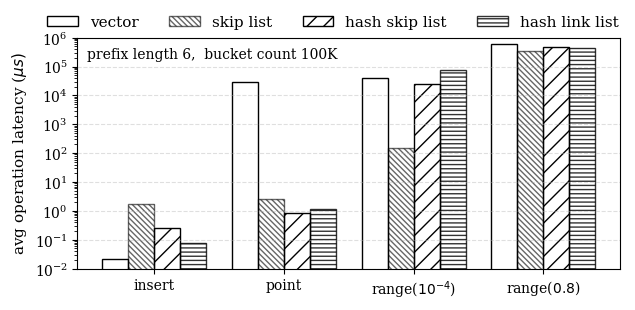

In [29]:
plt.rcParams["font.family"] = "serif"

FIGSIZE = (7, 3)


fig, ax = plt.subplots(figsize=FIGSIZE)

width = 0.2

ax.bar(
    0 - 0.3,
    avg_time_insert["Vector"],
    width,
    label="vector",
    **get_properties("Vector"),
)
ax.bar(
    0 - 0.1,
    avg_time_insert["Skip"],
    width,
    label="skip list",
    **get_properties("Skiplist"),
)
rect1 = ax.bar(
    0 + 0.1,
    avg_time_insert["HashSkipList"],
    width,
    label="hash skip list",
    **get_properties("HashSkipList"),
)
rect2 = ax.bar(
    0 + 0.3,
    avg_time_insert["HashLinkList"],
    width,
    label="hash link list",
    **get_properties("HashLinkList"),
)

# annotate_label(ax, rect1, rect2, f"  l {l}, bck {bck}")

ax.bar(
    1 - 0.3,
    avg_time_pq["Vector"],
    width,
    **get_properties("Vector"),
)
ax.bar(
    1 - 0.1,
    avg_time_pq["Skip"],
    width,
    **get_properties("Skiplist"),
)
rect3 = ax.bar(
    1 + 0.1,
    avg_time_pq["HashSkipList"],
    width,
    **get_properties("HashSkipList"),
)
rect4 = ax.bar(
    1 + 0.3,
    avg_time_pq["HashLinkList"],
    width,
    **get_properties("Hashlinklist"),
)

# annotate_label(ax, rect3, rect4, f"  l {l}, bck {bck}")

ax.bar(
    2 - 0.3,
    avg_time_range["Vector"],
    width,
    **get_properties("Vector"),
)
ax.bar(
    2 - 0.1,
    avg_time_range["Skip"],
    width,
    **get_properties("Skiplist"),
)
rect5 = ax.bar(
    2 + 0.1,
    avg_time_range["HashSkipList"],
    width,
    **get_properties("HashSkipList"),
)
rect6 = ax.bar(
    2 + 0.3,
    avg_time_range["HashLinkList"],
    width,
    **get_properties("HashLinkList"),
)

# annotate_label(ax, rect5, rect6, f"  l {l}, bck {bck}")

ax.bar(
    3 - 0.3,
    avg_time_lrange["Vector"],
    width,
    **get_properties("Vector"),
)
ax.bar(
    3 - 0.1,
    avg_time_lrange["Skip"],
    width,
    **get_properties("Skiplist"),
)
rect7 = ax.bar(
    3 + 0.1,
    avg_time_lrange["HashSkipList"],
    width,
    **get_properties("HashSkipList"),
)
rect8 = ax.bar(
    3 + 0.3,
    avg_time_lrange["HashLinkList"],
    width,
    **get_properties("HashLinkList"),
)

# annotate_label(ax, rect7, rect8, f"  l {l}, bck {bck}")

xticks = [i for i in range(4)]
ax.set_xticks(xticks)
ax.set_xticklabels(["insert", "point", r"range($10^{-4}$)", r"range($0.8$)"], fontsize=10)

ax.set_ylabel("avg operation latency (${\mu}s)$", fontsize=11)

ax.set_ylim(bottom=(10**-2), top=(10**6))
# ax.set_title(f"l {l}, bck {bck}", fontsize=11)

fig.legend(loc='upper center', ncol=4, fontsize=11, bbox_to_anchor=(0.49, 1), frameon=False)
ax.set_yscale("log")
ax.text(x=0.48, y=0.93, s='prefix length 6,  bucket count 100K', fontsize=10,
        horizontalalignment='right', 
        verticalalignment='center', 
        transform=ax.transAxes)
# grid = True
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br>

In [30]:
def get_exp_dirname(query_type: str, selectivity: float, entry_size: int) -> str:
    return (
        f"{__WORKING_BRANCH_PATH}/experiments-{query_type}-{selectivity}-{entry_size}"
    )


def get_log_dirname(
    query_type: str,
    inserts: int,
    point_queries: int,
    range_queries: int,
    selectivity: float,
    memtable: str,
    entry_size: int,
    number_of_entries_per_page: int,
    number_of_pages: int,
    prefixlen: int = 0,
    bucket_count: int = 0,
    size_ratio: int = 4,
    updates: int = 0,
):
    if memtable.lower() in ("hashskiplist", "hashlinklist"):
        return f"{get_exp_dirname(query_type, selectivity, entry_size)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio} l {prefixlen} bucket_count {bucket_count}"
    return f"{get_exp_dirname(query_type, selectivity, entry_size)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio}"

In [36]:
def prepare_dataframe(log_file_path: str, key: str="RangeQueryTime: ") -> pd.DataFrame:
    ff = open(log_file_path, "r")
    range_quereis = []

    for line in ff.readlines():
        if key in line:
            range_quereis.append(float(line.split(" ")[1]))
    
    return pd.DataFrame(range_quereis, columns=["TimeTaken"])


In [46]:
query_type = "MOTIVATION"
prefix_lengths = [2, 4, 6, 8, 10]
bucket_counts = [100, 1000, 5000, 10000, 65536, 100000]

entry_size = 64
memtables = ["Vector", "SkipList", "Hashskiplist", "Hashlinklist"]
inserts = 140000
point_queries = 200
range_queries = 200
number_of_entries_per_page = 64
number_of_pages = 4096
updates = 0
selectivity = 0.0001


In [47]:
inserts_df = list()
point_queries_df = list()
srange_queries_df = list()
lrange_queries_df = list()

for prefixlen in prefix_lengths:
    for bck in bucket_counts:
        for memtable in memtables:
            log_dir = get_log_dirname(
                query_type,
                inserts,
                point_queries,
                range_queries,
                selectivity,
                memtable,
                entry_size,
                number_of_entries_per_page,
                number_of_pages,
                prefixlen=prefixlen,
                bucket_count=bck,
                updates=updates,
            )

            inserts_log_file = f"{log_dir}/workload.log"
            point_queries_log_file = f"{log_dir}/workload.log"
            srange_queries_log_file = f"{log_dir}/workload.log"
            lrange_queries_log_file = f"{log_dir}/workload.log"

            inserts_df.append({
                "df": prepare_dataframe(inserts_log_file, key="InsertTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bck,
                "memtable": memtable
            })

            point_queries_df.append({
                "df": prepare_dataframe(point_queries_log_file, key="PointQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bck,
                "memtable": memtable
            })

            srange_queries_df.append({
                "df": prepare_dataframe(srange_queries_log_file, key="RangeQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bck,
                "memtable": memtable
            })

            lrange_queries_df.append({
                "df": prepare_dataframe(lrange_queries_log_file, key="RangeQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bck,
                "memtable": memtable
            })


120